In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Correct file path and read the CSV
train = pd.read_csv('/content/train.csv', on_bad_lines='skip')

<ipython-input-93-29279230fab7>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/train.csv', on_bad_lines='skip')


In [ ]:
train.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
# Convert date into int
# Convert Date to datetime format
train["Date"] = pd.to_datetime(train["Date"])
train.sort_values('Date', inplace=True)

In [ ]:
train['Date']

,Date
1017208,2013-01-01
1016473,2013-01-01
1016472,2013-01-01
1016471,2013-01-01
1016470,2013-01-01
...,...
745,2015-07-31
746,2015-07-31
747,2015-07-31
741,2015-07-31


In [ ]:
#Aggregate sales by date (sum over all stores for simplicity)
time_series_data = train.groupby("Date")["Sales"].sum().reset_index()

#Set Date as index
time_series_data.set_index("Date", inplace=True)

time_series_data

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


In [ ]:
# Aggregate sales using time series
train2 = train.groupby(['Store', 'Date']).agg({'Sales': 'sum'}).reset_index()

In [ ]:
train2.head()

,Store,Date,Sales
0,1,2013-01-01,0
1,1,2013-01-02,5530
2,1,2013-01-03,4327
3,1,2013-01-04,4486
4,1,2013-01-05,4997


In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
#Check whether your time Series Data is Stationary
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The data is stationary (Reject H0)")
        return True
    else:
        print("The data is NOT stationary (Fail to Reject H0)")
        return False
check_stationarity(time_series_data["Sales"])

ADF Statistic: -4.761614524595619
p-value: 6.436731330559227e-05
The data is stationary (Reject H0)


True

In [ ]:
# Step 3: Apply Differencing if Non-Stationary
time_series_data["Sales_Diff"] = time_series_data["Sales"].diff().dropna()

check_stationarity(time_series_data["Sales_Diff"].dropna())

ADF Statistic: -14.008528601649763
p-value: 3.750044004604795e-26
The data is stationary (Reject H0)


True

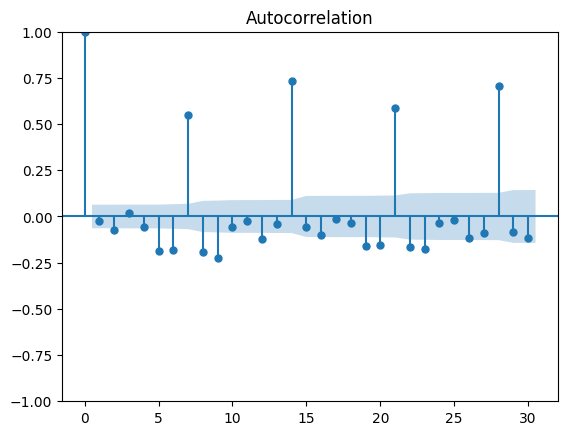

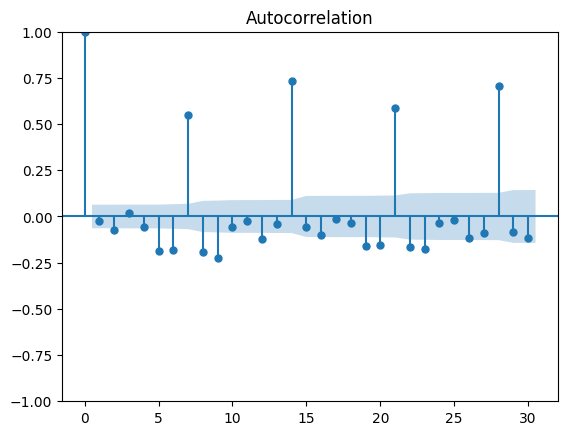

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot
plot_acf(time_series_data["Sales"])

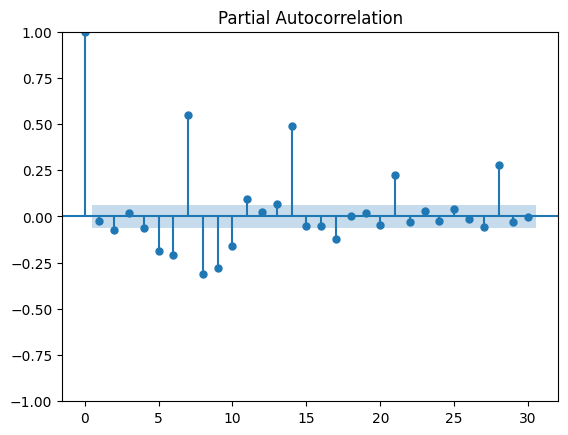

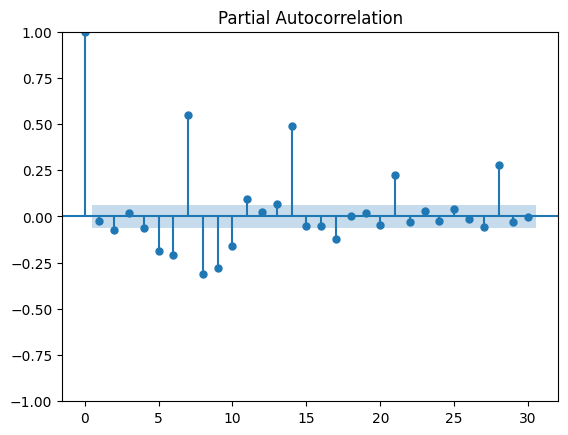

In [ ]:
plot_pacf(time_series_data["Sales"])


In [ ]:
#Transform the time series data into supervised learning data by creating a new y(target) column.


In [ ]:
#For example as illustrated here in the Sliding Window For Time Series Data section


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1017208 to 0
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 77.6+ MB


In [ ]:
# Convert 'StateHoliday' object to int safely
train['StateHoliday'] = train['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3}).fillna(0).astype(int)

In [ ]:
train.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846062080,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Step 2: Create a supervised learning dataset (Sliding Window technique)
def create_supervised_data(train, target_col='Sales', n_lags=3):
    supervised_data = train[[target_col]].copy()
    for i in range(1, n_lags + 1):
        supervised_data[f'lag_{i}'] = train[target_col].shift(i)
    supervised_data.dropna(inplace=True)
    return supervised_data

supervised_data = create_supervised_data(train, 'Sales')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Step 3: Scale the data in the (-1, 1) range
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(supervised_data)

In [ ]:
# Split features and target
X = scaled_data[:, 1:]  # Lagged features
y = scaled_data[:, 0]   # Target (next sales)

In [ ]:
pd.DataFrame(scaled_data, columns=supervised_data.columns).head()


,Sales,lag_1,lag_2,lag_3
0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0


In [ ]:
X = X.reshape((X.shape[0], 1, X.shape[1]))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the LSTM Regression model
model = keras.models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.LSTM(32),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Regression model for predicting next sale
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - loss: 0.0232 - mae: 0.1013 - val_loss: 0.0177 - val_mae: 0.0909
Epoch 2/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 136s 5ms/step - loss: 0.0180 - mae: 0.0917 - val_loss: 0.0178 - val_mae: 0.0953
Epoch 3/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 121s 5ms/step - loss: 0.0179 - mae: 0.0912 - val_loss: 0.0178 - val_mae: 0.0946
Epoch 4/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 127s 5ms/step - loss: 0.0178 - mae: 0.0906 - val_loss: 0.0176 - val_mae: 0.0876
Epoch 5/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 119s 5ms/step - loss: 0.0177 - mae: 0.0902 - val_loss: 0.0176 - val_mae: 0.0894


In [ ]:
eval_result = model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_result[0]:.4f}, Test MAE: {eval_result[1]:.4f}")

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0177 - mae: 0.0896
Test Loss: 0.0176, Test MAE: 0.0894


In [ ]:
#dump model
import pickle
pickle.dump(model, open('dl_model.pkl', 'wb'))

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
